# Install environment
### you'll need [anaconda](https://www.anaconda.com/download)
```bash
conda create -n kibo python=3.11
conda activate kibo
# Install the ultralytics package from PyPI
pip install opencv-python
pip install matplotlib
```

### for detail version of opencv [click me](https://pypi.org/project/opencv-python/#history)

# sample code of detect aruco marker in opencv-python 4.9.80

(-0.5, 525.5, 511.5, -0.5)

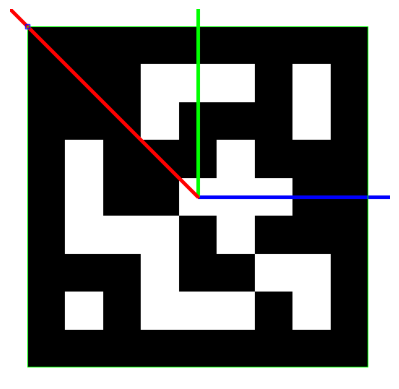

In [1]:
import cv2 as cv
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("33.png")

marker_length = 0.05
obj_points = np.array(
    [
        [-marker_length / 2, -marker_length / 2, 0],
        [marker_length / 2, -marker_length / 2, 0],
        [marker_length / 2, marker_length / 2, 0],
        [-marker_length / 2, marker_length / 2, 0],
    ]
)
cameraMatrix = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
distCoeffs = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_7X7_250)

corners, ids, rejectedImgPoints = aruco.detectMarkers(img, aruco_dict)

if ids is not None:
    for i in range(len(ids)):
        rvecs, tvecs, _ = aruco.estimatePoseSingleMarkers(
            corners[i], marker_length, cameraMatrix, distCoeffs
        )
        aruco.drawAxis(img, cameraMatrix, distCoeffs, rvecs, tvecs, 0.1)
        img = aruco.drawDetectedMarkers(img, corners)

plt.imshow(img)
plt.axis("off")

# Tasks
- simulate the environment of astrobee taking pictures
    - put aruco marker on the wall
    - put pictures on the designated location
- detect aruco marker in the image
- cut out the rectangle area of the designated size from the image based on the aruco marker position, size, and orientation